### Didactic example taken from (and slightly adapted) http://www.nature.com/nature/journal/v534/n7605/full/nature18003.html

In [240]:
import pandas as pd
import seaborn as sns

In [241]:
### Set path to the data set
dataset_path = "../input/77_cancer_proteomes_CPTAC_itraq.csv"
clinical_info = "../input/clinical_data_breast_cancer.csv"
pam50_proteins = "../input/PAM50_proteins.csv"

In [242]:
## Load data
data = pd.read_csv(dataset_path,header=0,index_col=0)
clinical = pd.read_csv(clinical_info,header=0,index_col=0)## holds clinical information about each patient/sample
pam50 = pd.read_csv(pam50_proteins,header=0)

In [243]:
print('data\n', data.head())


data
                         gene_symbol           gene_name  AO-A12D.01TCGA  \
RefSeq_accession_number                                                   
NP_958782                      PLEC   plectin isoform 1        1.096131   
NP_958785                       NaN  plectin isoform 1g        1.111370   
NP_958786                      PLEC  plectin isoform 1a        1.111370   
NP_000436                       NaN  plectin isoform 1c        1.107561   
NP_958781                       NaN  plectin isoform 1e        1.115180   

                         C8-A131.01TCGA  AO-A12B.01TCGA  BH-A18Q.02TCGA  \
RefSeq_accession_number                                                   
NP_958782                      2.609943       -0.659828        0.195341   
NP_958785                      2.650422       -0.648742        0.215413   
NP_958786                      2.650422       -0.654285        0.215413   
NP_000436                      2.646374       -0.632113        0.205377   
NP_958781         

In [244]:
print('clinical\n', clinical.head())

clinical
                   Gender  Age at Initial Pathologic Diagnosis ER Status  \
Complete TCGA ID                                                          
TCGA-A2-A0T2      FEMALE                                   66  Negative   
TCGA-A2-A0CM      FEMALE                                   40  Negative   
TCGA-BH-A18V      FEMALE                                   48  Negative   
TCGA-BH-A18Q      FEMALE                                   56  Negative   
TCGA-BH-A0E0      FEMALE                                   38  Negative   

                 PR Status HER2 Final Status Tumor Tumor--T1 Coded Node  \
Complete TCGA ID                                                          
TCGA-A2-A0T2      Negative          Negative    T3         T_Other   N3   
TCGA-A2-A0CM      Negative          Negative    T2         T_Other   N0   
TCGA-BH-A18V      Negative          Negative    T2         T_Other   N1   
TCGA-BH-A18Q      Negative          Negative    T2         T_Other   N1   
TCGA-BH-A0E0  

In [245]:
#see that the names from data are different than those from clinical
print('pam50\n', pam50.head())


pam50
   GeneSymbol RefSeqProteinID       Species  \
0        MIA       NP_006524  Homo sapiens   
1      FGFR4       NP_002002  Homo sapiens   
2      FGFR4       NP_998812  Homo sapiens   
3      FGFR4       NP_075252  Homo sapiens   
4     GPR160       NP_055188  Homo sapiens   

                             Gene Name  
0         melanoma inhibitory activity  
1  fibroblast growth factor receptor 4  
2  fibroblast growth factor receptor 4  
3  fibroblast growth factor receptor 4  
4       G protein-coupled receptor 160  


In [246]:
print('genes', len(pam50.GeneSymbol.unique()))
print('proteins', len(pam50.RefSeqProteinID.unique()))


genes 50
proteins 100


In [247]:
## Drop unused information columns
data.drop(['gene_symbol','gene_name'],axis=1,inplace=True)

In [248]:
## Change the protein data sample names to a format matching the clinical data set
import re

data.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) if bool(re.search("TCGA",x)) is True else x,inplace=True)

In [249]:
#Check if names are ok
data.head()

,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AO-A12D,...,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [250]:
## Transpose data for the clustering algorithm since we want to divide patient samples, not proteins
data = data.T

In [251]:
#do samples match?
print(len(data.index))
print(len(clinical.index))

83
105


In [252]:
## Add clinical meta data to our protein data set, note: all numerical features for analysis start with NP_ or XP_
merged = data.merge(clinical,left_index=True,right_index=True)
"""
left_index : boolean, default False
Use the index from the left DataFrame as the join key(s). If it is a MultiIndex, the number of keys in the other DataFrame (either the index or a number of columns) must match the number of levels
right_index : boolean, default False
Use the index from the right DataFrame as the join key. Same caveats as left_index
"""

'\nleft_index : boolean, default False\nUse the index from the left DataFrame as the join key(s). If it is a MultiIndex, the number of keys in the other DataFrame (either the index or a number of columns) must match the number of levels\nright_index : boolean, default False\nUse the index from the right DataFrame as the join key. Same caveats as left_index\n'

In [253]:
len(merged.index)

80

In [254]:
## Change name to make it look nicer in the code!
processed = merged

#some columns contains other information, like pre-made clusters, we will use them as reference
processed.columns

Index(['NP_958782', 'NP_958785', 'NP_958786', 'NP_000436', 'NP_958781',
       'NP_958780', 'NP_958783', 'NP_958784', 'NP_112598', 'NP_001611',
       ...
       'PAM50 mRNA', 'SigClust Unsupervised mRNA', 'SigClust Intrinsic mRNA',
       'miRNA Clusters', 'methylation Clusters', 'RPPA Clusters',
       'CN Clusters', 'Integrated Clusters (with PAM50)',
       'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
      dtype='object', length=12582)

In [255]:
## Numerical data for the algorithm, NP_xx/XP_xx are protein identifiers from RefSeq database
##in this case it corresponds to all the columns
numerical_cols = [x for x in processed.columns if bool(re.search("NP_|XP_", x)) == True ]
#label indexing
processed_numerical = processed.loc[:, numerical_cols]

In [256]:
bool_pam_50 = processed_numerical.columns.isin(pam50['RefSeqProteinID'])
#boolean indexing
processed_numerical_p50 = processed_numerical.iloc[:, bool_pam_50]

In [257]:
#are there missing values?
processed_numerical_p50.isnull().sum()

NP_057427        0
NP_002408        0
NP_000415        0
NP_000413        0
NP_000517        0
NP_004439        0
NP_005219        0
NP_058519        0
NP_058518        0
NP_001116539     0
NP_061155        0
NP_001035932     0
NP_077006        0
NP_000917        0
NP_065178        0
NP_006836        0
NP_006614        0
NP_001784        3
NP_006092        2
NP_001153651     0
NP_001159403     0
NP_000116        0
NP_004314        0
NP_060601        2
NP_005931        0
NP_003003        0
NP_113611        5
NP_002002       11
NP_004487        0
NP_008950        0
NP_114172        6
NP_001062        5
NP_001444       41
NP_057547        6
NP_054895        0
NP_001246        9
NP_055606       35
NP_036451       18
NP_000624       20
NP_569082       56
NP_001159       15
NP_001229       47
NP_002458       58
dtype: int64

In [258]:
processed_numerical_p50.head(20)

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_057547,NP_054895,NP_001246,NP_055606,NP_036451,NP_000624,NP_569082,NP_001159,NP_001229,NP_002458
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,-1.292949,3.541400,3.177722,NaN,-1.792547,NaN,NaN,2.516489,2.556897,NaN
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,-3.694601,2.495856,2.722053,0.373604,-1.342826,-4.183584,-2.889608,3.487128,NaN,-0.714133
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-1.410193,0.702364,-1.402538,NaN,NaN,1.934688,NaN,0.798041,2.003576,NaN
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,0.018893,-1.574649,-4.515280,NaN,NaN,2.049328,NaN,-0.266769,-3.201798,-7.724769
TCGA-A2-A0EX,-2.506723,-2.953194,-0.803378,-2.315378,-0.098028,-1.643795,-1.212331,4.186597,3.976493,3.942726,...,-0.822137,-2.938187,-3.395914,-1.827636,0.082061,0.044543,-2.079011,-3.046991,2.554537,-0.443199
TCGA-A2-A0EY,-1.015330,-0.840446,-3.059805,-3.638587,-2.547645,5.800973,-3.571964,-6.465874,-6.361777,-6.557480,...,-0.303303,-1.327622,-0.615596,0.204692,NaN,NaN,-0.490679,-1.169394,NaN,NaN
TCGA-A2-A0SW,0.293752,0.039676,-5.945578,-3.610654,-1.899662,-4.308558,-3.372659,-2.099063,-1.976850,-1.565183,...,-0.371991,0.419182,-0.774010,NaN,-0.510286,-0.317317,NaN,0.313049,NaN,NaN
TCGA-A2-A0SX,1.457488,1.385987,5.625404,3.271828,2.166540,-4.891209,-1.774955,-4.414536,-4.414536,-3.776985,...,NaN,-2.063939,0.313471,NaN,NaN,-1.337011,NaN,0.393910,NaN,NaN
TCGA-A2-A0T3,1.059592,-0.451477,-0.355684,0.305602,0.123285,-3.937134,-3.102801,2.165855,1.597273,1.897015,...,1.516930,0.592984,0.738219,-0.510190,-1.480488,-0.847013,NaN,1.921736,NaN,NaN
TCGA-A2-A0T6,-2.885329,-3.435150,-2.781589,-3.189632,-2.297470,-4.804515,-2.553362,-0.720625,-0.772495,-0.616886,...,0.939211,-2.141861,-3.549264,NaN,-1.460636,-0.813991,NaN,NaN,-1.187454,-7.000341


In [259]:
#how many proteins?
len(processed_numerical_p50.columns)

43

In [260]:
#NaN
## Impute missing values (maybe another method would work better? mean, or drop columns?)
from sklearn.preprocessing import Imputer, StandardScaler


imputer = Imputer(missing_values='NaN', strategy='median', axis=1).fit(processed_numerical_p50)
processed_numerical_p50 = imputer.transform(processed_numerical_p50)
scaler = StandardScaler()
processed_numerical_p50= scaler.fit_transform(processed_numerical_p50)
# Bewarem imputer.transform returns a numpy array, not a dataframe

In [261]:
#if dimensions > 10 (quite always), try different models (for KMeans different clusters).
## Check which number of clusters works best, 20 and 79 are just for fun and comparison.
n_clusters = [2,3,4,5,6,7,8,10,20,79]

In [262]:
from sklearn.cluster import KMeans
from sklearn import metrics

def compare_k_means(k_list, data):
    ## Run clustering with different k and check the metrics
    for k in k_list:
        clusterer = KMeans(n_clusters=k, random_state=0)
        clusterer.fit(data)
        ##
        print("Silhouette Coefficient for k == {}: {}".format(k, metrics.silhouette_score(data, clusterer.labels_)))
        print("Homogeneity score for k == {}: {}".format(k, metrics.homogeneity_score(processed['PAM50 mRNA'], clusterer.labels_)))
        
        print("------------------------------------")

In [263]:
#Non-perfect labelings that further split classes into more clusters can be perfectly homogeneous
compare_k_means(n_clusters,processed_numerical_p50)

Silhouette Coefficient for k == 2: 0.15696581955301553
Homogeneity score for k == 2: 0.15645672612444617
------------------------------------
Silhouette Coefficient for k == 3: 0.1321317039329827
Homogeneity score for k == 3: 0.4345852830582786
------------------------------------
Silhouette Coefficient for k == 4: 0.130101973372293
Homogeneity score for k == 4: 0.5099731951878883
------------------------------------
Silhouette Coefficient for k == 5: 0.11989046761712183
Homogeneity score for k == 5: 0.5036832758691269
------------------------------------
Silhouette Coefficient for k == 6: 0.11377601873559848
Homogeneity score for k == 6: 0.5140619986562179
------------------------------------
Silhouette Coefficient for k == 7: 0.1055790249082336
Homogeneity score for k == 7: 0.49012055189297393
------------------------------------
Silhouette Coefficient for k == 8: 0.09885918174149169
Homogeneity score for k == 8: 0.5307514570967622
------------------------------------
Silhouette Coef

In [264]:
processed['PAM50 mRNA']

TCGA-A2-A0CM       Basal-like
TCGA-A2-A0D2       Basal-like
TCGA-A2-A0EQ    HER2-enriched
TCGA-A2-A0EV        Luminal A
TCGA-A2-A0EX        Luminal A
TCGA-A2-A0EY        Luminal B
TCGA-A2-A0SW        Luminal B
TCGA-A2-A0SX       Basal-like
TCGA-A2-A0T3        Luminal B
TCGA-A2-A0T6        Luminal A
TCGA-A2-A0YC        Luminal A
TCGA-A2-A0YD        Luminal A
TCGA-A2-A0YF        Luminal A
TCGA-A2-A0YG        Luminal B
TCGA-A2-A0YM       Basal-like
TCGA-A7-A0CE       Basal-like
TCGA-A7-A0CJ        Luminal B
TCGA-A7-A13F        Luminal B
TCGA-A8-A06N        Luminal B
TCGA-A8-A06Z        Luminal B
TCGA-A8-A076    HER2-enriched
TCGA-A8-A079        Luminal B
TCGA-A8-A08Z        Luminal A
TCGA-A8-A09G    HER2-enriched
TCGA-AN-A04A        Luminal A
TCGA-AN-A0AJ        Luminal B
TCGA-AN-A0AL       Basal-like
TCGA-AN-A0AM        Luminal B
TCGA-AN-A0FK        Luminal B
TCGA-AN-A0FL       Basal-like
                    ...      
TCGA-AR-A1AP        Luminal A
TCGA-AR-A1AS        Luminal A
TCGA-AR-A1

In [265]:
#What would have happened with random proteins?
## Create a random numerical matrix with imputation:
from numpy import random

rnd_indexing = random.choice(range( processed_numerical.shape[1]) , 43)
processed_numerical_random = processed_numerical.iloc[:, rnd_indexing]
#NaN inside!
imputer_rnd = imputer.fit(processed_numerical_random)
processed_numerical_random = imputer_rnd.transform(processed_numerical_random)

In [266]:
compare_k_means(n_clusters, processed_numerical_random)

Silhouette Coefficient for k == 2: 0.18139766474551328
Homogeneity score for k == 2: 0.006691783286436506
------------------------------------
Silhouette Coefficient for k == 3: 0.09508810640027136
Homogeneity score for k == 3: 0.13287987858562117
------------------------------------
Silhouette Coefficient for k == 4: 0.09576763484884528
Homogeneity score for k == 4: 0.16431305682498729
------------------------------------
Silhouette Coefficient for k == 5: 0.07687697445241165
Homogeneity score for k == 5: 0.23244254922815916
------------------------------------
Silhouette Coefficient for k == 6: 0.07207562887572469
Homogeneity score for k == 6: 0.23791569223882814
------------------------------------
Silhouette Coefficient for k == 7: 0.049563259325426566
Homogeneity score for k == 7: 0.21021018808802214
------------------------------------
Silhouette Coefficient for k == 8: 0.059942656370042105
Homogeneity score for k == 8: 0.2787380835562575
------------------------------------
Silh

In [267]:
#The scores are pretty much lower than p50 (are they significantly lower?)
processed['PAM50 mRNA'].values

array(['Basal-like', 'Basal-like', 'HER2-enriched', 'Luminal A',
       'Luminal A', 'Luminal B', 'Luminal B', 'Basal-like', 'Luminal B',
       'Luminal A', 'Luminal A', 'Luminal A', 'Luminal A', 'Luminal B',
       'Basal-like', 'Basal-like', 'Luminal B', 'Luminal B', 'Luminal B',
       'Luminal B', 'HER2-enriched', 'Luminal B', 'Luminal A',
       'HER2-enriched', 'Luminal A', 'Luminal B', 'Basal-like',
       'Luminal B', 'Luminal B', 'Basal-like', 'Luminal B', 'Basal-like',
       'Luminal A', 'Luminal B', 'HER2-enriched', 'Luminal A',
       'Basal-like', 'Luminal B', 'Luminal A', 'Luminal B', 'Luminal B',
       'HER2-enriched', 'HER2-enriched', 'Luminal A', 'Basal-like',
       'Luminal A', 'Luminal B', 'Luminal B', 'HER2-enriched',
       'Basal-like', 'Luminal A', 'Luminal A', 'Luminal B', 'Luminal A',
       'Basal-like', 'Luminal A', 'Luminal A', 'Luminal B', 'Luminal B',
       'Luminal A', 'Luminal A', 'Luminal A', 'Luminal A', 'Basal-like',
       'Luminal B', 'HER2-enr

## Visualization

In [268]:
## Visualize data using k==3, show the heatmap of protein expression for the used PAM50 proteins (43 available in our data)
clusterer_final = KMeans(n_clusters=3, random_state=0).fit(processed_numerical_p50)
processed_p50_plot = pd.DataFrame(processed_numerical_p50) #to use pandas methods
## add a column with the predictions
processed_p50_plot['KMeans_cluster'] = clusterer_final.labels_

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

processed_p50_plot['ref_cluster']= le.fit_transform(processed['PAM50 mRNA'].values)
## sort the samples (axis 0) by cluster
processed_p50_plot.sort_values('KMeans_cluster', axis = 0, inplace=True)

In [269]:
processed_p50_plot.tail()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,KMeans_cluster,ref_cluster
49,0.660950,2.183580,-0.726834,-0.896669,-0.648917,-0.969341,2.777924,-0.914306,-0.919375,-0.896533,...,1.279511,0.089925,0.103084,0.239467,0.793790,0.699270,-0.038193,0.410067,2,0
36,1.277512,-0.302547,-1.268637,-0.466743,-0.252374,-0.034552,-0.093599,-0.139466,-0.113004,-0.161025,...,-0.119420,-0.443904,0.989568,-0.047486,-0.265465,0.644040,-0.465502,0.088911,2,0
44,2.095712,0.450473,0.850413,1.495109,1.105120,-0.117147,0.228672,-0.199258,-0.203224,-0.195063,...,1.051265,1.889622,-0.036834,-1.095819,0.706839,1.256316,0.159315,0.723191,2,0
65,0.337093,-0.035957,1.320048,0.720312,1.699028,0.528164,1.477650,-0.514438,-0.666041,-0.636857,...,0.597110,0.032535,0.626756,-0.521790,0.002988,0.044311,1.090895,-1.717836,2,1
0,1.915429,1.787003,2.368701,0.956765,2.681554,-0.857792,0.685045,-1.013190,-1.010000,-1.054019,...,1.900924,0.848312,-0.723463,0.875375,1.344156,1.886258,1.534476,0.866318,2,0


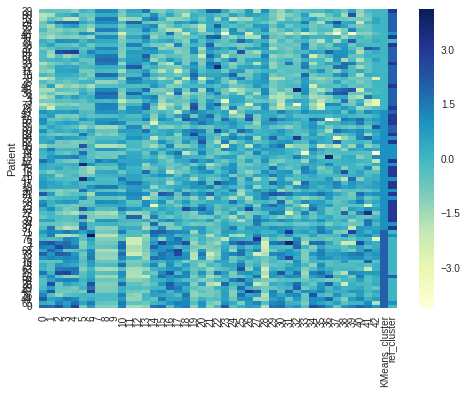

In [270]:
processed_p50_plot.index.name = 'Patient'
sns.heatmap(processed_p50_plot, cmap='YlGnBu')

In [271]:
le.inverse_transform([0,1,2,3])

array(['Basal-like', 'HER2-enriched', 'Luminal A', 'Luminal B'], dtype=object)